# CS 1656 – Introduction to Data Science (Spring 2021) 

## Instructor: Xiaowei Jia /Teaching Assistant: Evangelos Karageorgos

## Term Project 

**Released: March 29, 2021**

**Due: April 22, 2021**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `pgh_bike.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, preprocessing, decomposition
from collections import Counter

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

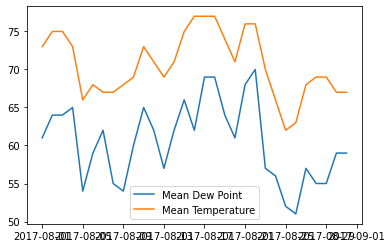

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [4]:
# Parses csv files into 3 dataframes, one for each quarter
df_2019_q1 = pd.read_csv('HealthyRideRentals2019-Q1.csv', sep=',', engine='python', parse_dates=['Starttime', 'Stoptime'])
df_2019_q2 = pd.read_csv('HealthyRideRentals2019-Q2.csv', sep=',', engine='python', parse_dates=['Starttime', 'Stoptime'])
df_2019_q3 = pd.read_csv('HealthyRideRentals2019-Q3.csv', sep=',', engine='python', parse_dates=['Starttime', 'Stoptime'])

# Combines all quarters into one df for 2019
quarters = [df_2019_q1, df_2019_q2, df_2019_q3]
df_2019 = pd.concat(quarters)

# Parses date and month from Starttime attribute
df_2019['month'] = df_2019['Starttime'].dt.month
df_2019['date'] = df_2019['Starttime'].dt.date

# Calculates fromCNT grouping by date
df_from_station_day = df_2019.groupby(['From station id', 'date'])['From station id'].count().rename('fromCNT')

# Calculates toCNT grouping by date
df_to_station_day = df_2019.groupby(['To station id', 'date'])['To station id'].count().rename('toCNT')

# Calculates rebalCNT grouping by date
# Imbalancing occurs when stationid changes and bikeid remains the same
df_rebalanced_day = df_2019.sort_values(['Bikeid','Starttime'])
df_rebalanced_day['first_bike_id'] = df_rebalanced_day['Bikeid'].shift(1)
df_rebalanced_day['first_station_id'] = df_rebalanced_day['To station id'].shift(1)
df_rebalanced_day = df_rebalanced_day.loc[(df_rebalanced_day['From station id'] != df_rebalanced_day['first_station_id'])
                                          & (df_rebalanced_day['Bikeid'] == df_rebalanced_day['first_bike_id'])]
df_rebalanced_day = df_rebalanced_day.groupby(['From station id', 'date'])['From station id'].count().rename('rebalCNT')

# Concatenates and prints dataframes
print("Daily Breakdown")
print("----------------------------------------------------")
df_daily_output = pd.concat([df_to_station_day, df_from_station_day, df_rebalanced_day], axis=1).drop_duplicates().fillna(0)
print(df_daily_output.head(20))

Daily Breakdown
----------------------------------------------------
                   toCNT  fromCNT  rebalCNT
       date                                
666.0  2019-07-20    0.0      1.0       1.0
       2019-08-02    0.0      2.0       2.0
1000.0 2019-01-01    4.0      4.0       0.0
       2019-01-02    0.0      2.0       0.0
       2019-01-03    3.0      0.0       0.0
       2019-01-04    1.0      2.0       0.0
       2019-01-05    5.0      5.0       0.0
       2019-01-06    2.0      1.0       0.0
       2019-01-07    2.0      2.0       0.0
       2019-01-10    1.0      1.0       0.0
       2019-01-11    0.0      1.0       0.0
       2019-01-12    2.0      0.0       0.0
       2019-01-13    1.0      0.0       0.0
       2019-01-15    6.0      3.0       0.0
       2019-01-19    1.0      3.0       0.0
       2019-01-27    2.0      3.0       1.0
       2019-02-03    2.0      3.0       2.0
       2019-02-04    9.0     10.0       1.0
       2019-02-05    7.0      5.0       0.0
       

### Task 1.2

In [5]:
# Calculates fromCNT like before but group by month
df_from_station_month = df_2019.groupby(['From station id', 'month'])['From station id'].count().rename('fromCNT')

# Calculates toCNT like before but group by month
df_to_station_month = df_2019.groupby(['To station id', 'month'])['To station id'].count().rename('toCNT')

# Calculates rebalanced like before but group by month
df_rebalanced_month = df_2019.sort_values(['Bikeid','Starttime'])
df_rebalanced_month['first_bike_id'] = df_rebalanced_month['Bikeid'].shift(1)
df_rebalanced_month['first_station_id'] = df_rebalanced_month['To station id'].shift(1)
df_rebalanced_month = df_rebalanced_month.loc[(df_rebalanced_month['From station id'] != df_rebalanced_month['first_station_id'])
                                              & (df_rebalanced_month['Bikeid'] == df_rebalanced_month['first_bike_id'])]
df_rebalanced_month = df_rebalanced_month.groupby(['From station id', 'month'])['From station id'].count().rename('rebalCNT')

# Concatenates and prints dataframes
print("Monthly Breakdown")
print("----------------------------------------------------")
df_monthly_output = pd.concat([df_to_station_month, df_from_station_month, df_rebalanced_month], axis=1).drop_duplicates().fillna(0)
print(df_monthly_output.head(20))

Monthly Breakdown
----------------------------------------------------
              toCNT  fromCNT  rebalCNT
       month                          
666.0  7        0.0      1.0       1.0
       8        0.0      2.0       2.0
1000.0 1       43.0     35.0       1.0
       2       58.0     51.0      11.0
       3      174.0    132.0      11.0
       4      434.0    392.0      11.0
       5      654.0    601.0      37.0
       6      719.0    666.0      43.0
       7      693.0    672.0      31.0
       8      640.0    586.0      19.0
       9      564.0    522.0      21.0
1001.0 1       82.0     59.0       1.0
       2       80.0     61.0       4.0
       3      134.0    117.0      14.0
       4      332.0    276.0      19.0
       5      500.0    429.0      15.0
       6      522.0    498.0      37.0
       7      605.0    552.0      76.0
       8      539.0    470.0      10.0
       9      462.0    415.0      20.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [6]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 1
filter_stationID = 1025

### Task 2.1

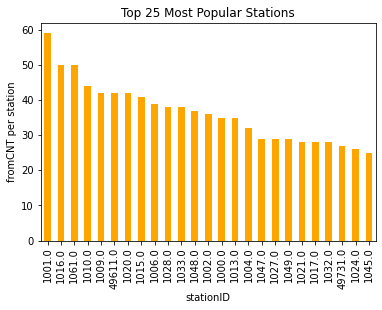

In [7]:
# Renames columns
df_from_station_month = df_from_station_month.reset_index()
df_from_station_month.rename(columns = {'From station id': 'stationID'}, inplace = True)

# Locates month matching filter
df_popular_stations = df_from_station_month.loc[df_from_station_month['month'] == int(filter_month)]

# Sorts df based on fromCNT
df_popular_stations = df_popular_stations.sort_values(['fromCNT'], ascending=False)

# Prints output graph containing top 25 stations
graph_popular_stations = df_popular_stations.head(25).plot.bar(x='stationID', y='fromCNT', ylabel='fromCNT per station', color="orange",
                                                      title='Top 25 Most Popular Stations',legend=None)

### Task 2.2

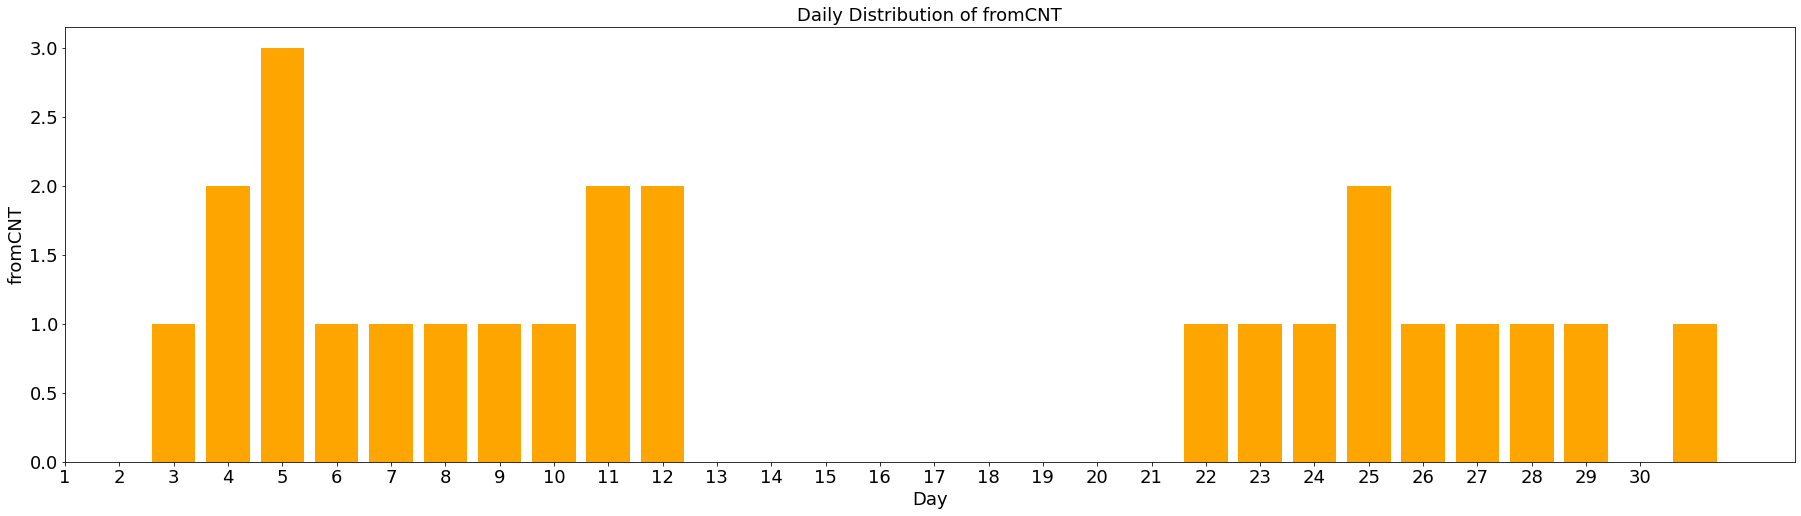

In [8]:
# Calculates number of days in a given month
days = 0
if filter_month == 2:
    days = 28
elif filter_month in [1,3,5,7,8,10,12]:
    days = 31
else:
    days = 30

# Parses day and month from date attribute in dataframe
df_from_station_day = df_from_station_day.reset_index()
df_from_station_day['day'] = pd.DatetimeIndex(df_from_station_day['date']).day
df_from_station_day['month'] = pd.DatetimeIndex(df_from_station_day['date']).month

# Selects data from dataframe matching filter_stationID and filter_month
df_station_daily = df_from_station_day.loc[(df_from_station_day['From station id'] == int(filter_stationID)) &
                                           (df_from_station_day['month'] == filter_month)]

# Outputs plot where x axis is Day, y axis is fromCNT, and x-ticks are all days in the month
plt.figure(figsize=(31,8))
plt.bar(df_station_daily['day'], df_station_daily['fromCNT'], color='orange')
plt.title('Daily Distribution of fromCNT', fontsize=18)
plt.xlabel('Day', fontsize= 18)
plt.xticks(range(1, days), range(1, days), fontsize=18)
plt.ylabel('fromCNT', fontsize= 18)
plt.yticks(fontsize= 18)
plt.show()

### Task 2.3

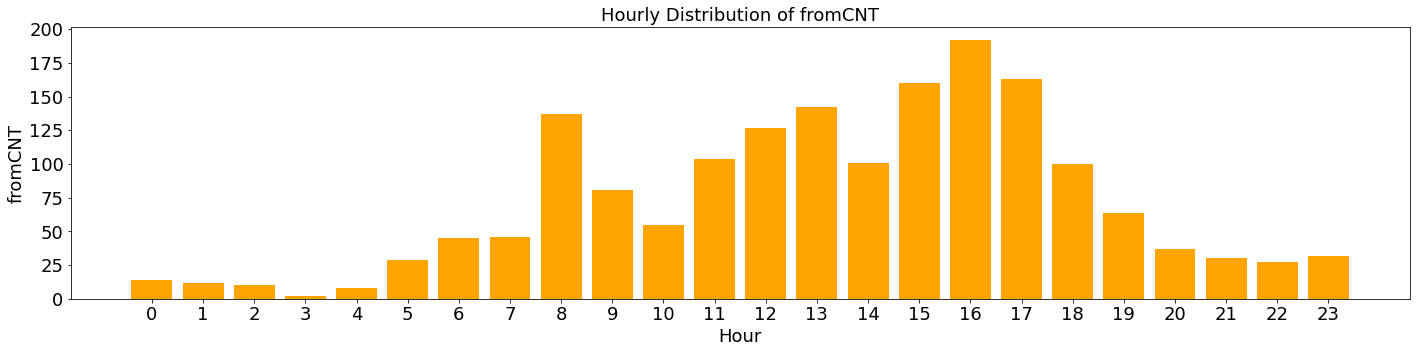

In [9]:
# Parses hour from original dataframe
df_2019['hour'] = df_2019['Starttime'].dt.hour

# Recalculates fromCNT this time grouping by hour as well
df_from_station_hour = df_2019.groupby(['From station id','date','month','hour'])['From station id'].count().rename('fromCNT').reset_index()

# Locates data in df with matching month and sums the counts by hour
df_from_station_month = df_from_station_hour.loc[df_from_station_hour['month'] == filter_month]
df_from_station_hour = df_from_station_month.groupby(['hour'])['fromCNT'].sum().rename('fromCNT').reset_index()

# Outputs graph where x-axis is Hour, y-axis is the updated fromCNT, and x-ticks are all the hours in a day
plt.figure(figsize=(24,5))
plt.bar(df_from_station_hour['hour'], df_from_station_hour['fromCNT'], color='orange')
plt.title('Hourly Distribution of fromCNT', fontsize=18)
plt.xlabel('Hour', fontsize= 18)
plt.xticks(range(0,24), fontsize=18)
plt.ylabel('fromCNT', fontsize= 18)
plt.yticks(fontsize= 18)
plt.show()

### Task 2.4

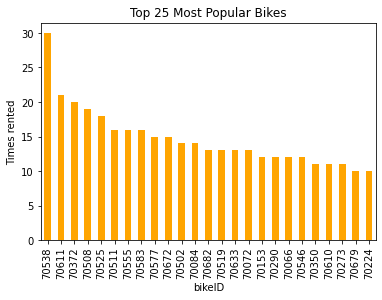

In [10]:
# Groups by Bikeid and month
df_bike_rentals = df_2019.groupby(['Bikeid','month'])['Bikeid'].count().rename('bikeCNT').reset_index()

# Filters month and sorts values
df_bike_month = df_bike_rentals.loc[df_bike_rentals['month'] == int(filter_month)].sort_values('bikeCNT', ascending=False)

# Prints output graph
graph_popular_bikes = df_bike_month.head(25).plot.bar(x='Bikeid', y='bikeCNT', ylabel='Times rented', xlabel='bikeID',
                                                      color="orange", title='Top 25 Most Popular Bikes', legend=None)

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

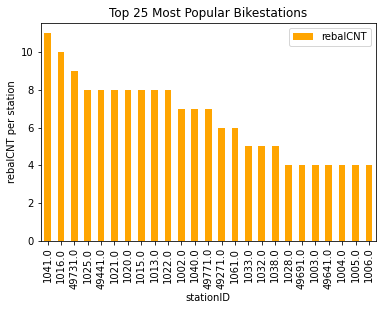

In [11]:
# Renames columns
df_rebalanced_month = df_rebalanced_month.reset_index()
df_rebalanced_month.rename(columns = {'From station id': 'stationID'}, inplace = True)

# Filters data based on filter_month, sorts values based on rebalCNT and creates bar graph of top 25 most popular stations
df_rebalanced_month_pop = df_rebalanced_month.loc[df_rebalanced_month['month'] == filter_month]
df_rebalanced_month_pop = df_rebalanced_month_pop.sort_values(['rebalCNT'], ascending=False)
df_rebalanced_month_pop = df_rebalanced_month_pop.head(25).plot.bar(x='stationID', y='rebalCNT', ylabel='rebalCNT per station',
                                                                    xlabel='stationID', color="orange", title='Top 25 Most Popular Bikestations')

### Task 3.2

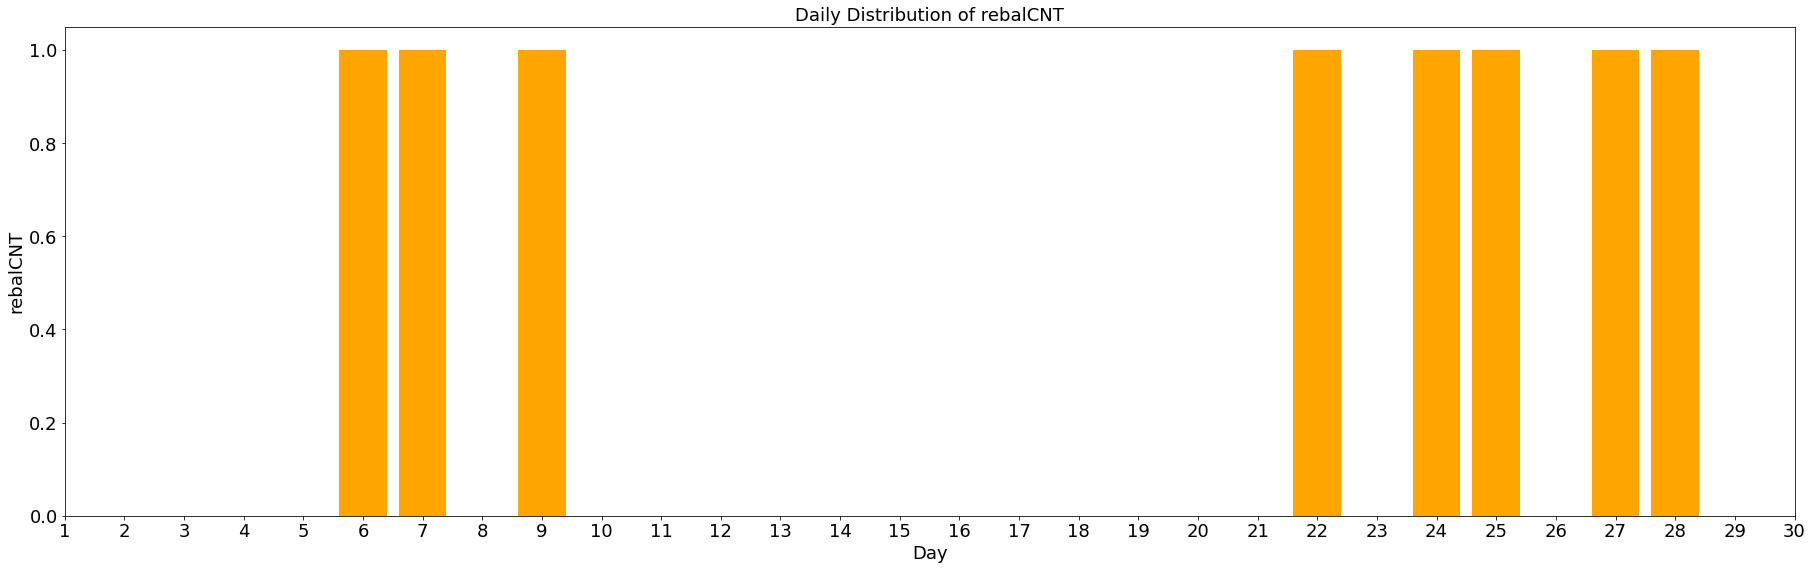

In [12]:
# Parses day and month from date attribute in dataframe
df_rebalanced_day = df_rebalanced_day.reset_index()
df_rebalanced_day['day'] = pd.DatetimeIndex(df_rebalanced_day['date']).day
df_rebalanced_day['month'] = pd.DatetimeIndex(df_rebalanced_day['date']).month

# Selects data from dataframe matching filter_stationID and filter_month
df_rebal_daily = df_rebalanced_day.loc[(df_rebalanced_day['From station id'] == int(filter_stationID)) &
                                           (df_rebalanced_day['month'] == filter_month)]

# Outputs plot where x axis is Day, y axis is rebalCNT, and x-ticks are all days in the month
plt.figure(figsize=(31,9))
plt.bar(df_rebal_daily['day'], df_rebal_daily['rebalCNT'], color='orange')
plt.title('Daily Distribution of rebalCNT', fontsize=18)
plt.xlabel('Day', fontsize= 18)
plt.xticks(range(1, days), range(1, days), fontsize=18)
plt.ylabel('rebalCNT', fontsize= 18)
plt.yticks(fontsize= 18)
plt.show()

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [13]:
# Parses date and month from Starttime attribute
df_2019_q3['month'] = df_2019_q3['Starttime'].dt.month
df_2019_q3['date'] = df_2019_q3['Starttime'].dt.date


# Groups q3 by month and From station id and renames From station id
df_month_clustering = df_2019_q3.groupby(['From station id', 'month'])['From station id'].count().rename('fromCNT').reset_index()
df_month_clustering.rename(columns={'From station id':'stationID'}, inplace=True)

# Creates a sum of each station based on month being 7, 8, or 9
df_month_clustering['fromCNT7'] = df_month_clustering.loc[df_month_clustering['month'] == 7]['fromCNT']
df_month_clustering['fromCNT8'] = df_month_clustering.loc[df_month_clustering['month'] == 8]['fromCNT']
df_month_clustering['fromCNT9'] = df_month_clustering.loc[df_month_clustering['month'] == 9]['fromCNT']
df_month_clustering = df_month_clustering.groupby(df_month_clustering['stationID']).aggregate({'fromCNT7': 'sum', 'fromCNT8': 'sum', 'fromCNT9': 'sum'})

# Sorts values and recalculates rebalancing
df_rebalanced_clustering = df_2019_q3.sort_values(['Bikeid', 'Starttime'])
df_rebalanced_clustering['first_bike_id'] = df_rebalanced_clustering['Bikeid'].shift(1)
df_rebalanced_clustering['first_station_id'] = df_rebalanced_clustering['To station id'].shift(1)
df_rebalanced_clustering = df_rebalanced_clustering.loc[(df_rebalanced_clustering['From station id'] != df_rebalanced_clustering['first_station_id'])
                                          & (df_rebalanced_clustering['Bikeid'] == df_rebalanced_clustering['first_bike_id'])]
df_rebalanced_clustering = df_rebalanced_clustering.groupby(['From station id', 'month'])['From station id'].count().rename('rebalCNT').reset_index()
df_rebalanced_clustering.rename(columns={'From station id' : 'stationID'}, inplace=True)

# Creates a sum of each station based on month being 7, 8, or 9
df_rebalanced_clustering['rebalCNT7'] = df_rebalanced_clustering.loc[df_rebalanced_clustering['month'] == 7]['rebalCNT']
df_rebalanced_clustering['rebalCNT8'] = df_rebalanced_clustering.loc[df_rebalanced_clustering['month'] == 8]['rebalCNT']
df_rebalanced_clustering['rebalCNT9'] = df_rebalanced_clustering.loc[df_rebalanced_clustering['month'] == 9]['rebalCNT']
df_rebalanced_clustering = df_rebalanced_clustering.groupby(df_rebalanced_clustering['stationID']).aggregate({'rebalCNT7': 'sum', 'rebalCNT8': 'sum', 'rebalCNT9': 'sum'})

# Joins rebalanced and month cluster dataframes
df_2019_q3_clustered = pd.concat([df_rebalanced_clustering, df_month_clustering], join='inner', axis=1).fillna(0)

# K value of 2
kmeans_2 = cluster.KMeans(n_clusters=2, init='k-means++', random_state=5000)
kmeans_2.fit(df_2019_q3_clustered[['fromCNT7','fromCNT8','fromCNT9','rebalCNT7','rebalCNT8','rebalCNT9']])

# K value of 4
kmeans_4 = cluster.KMeans(n_clusters=4, init='k-means++', random_state=5000)
kmeans_4.fit(df_2019_q3_clustered[['fromCNT7','fromCNT8','fromCNT9','rebalCNT7','rebalCNT8','rebalCNT9']])

# K value of 16
kmeans_16 = cluster.KMeans(n_clusters=16, init='k-means++', random_state=5000)
kmeans_16.fit(df_2019_q3_clustered[['fromCNT7','fromCNT8','fromCNT9','rebalCNT7','rebalCNT8','rebalCNT9']])

# Scales and normalizes data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df_2019_q3_clustered)
X_normalized = pd.DataFrame(preprocessing.normalize(X_scaled))

# Reduce dimensionality
pca = decomposition.PCA(n_components=2)
X_principal = pd.DataFrame(pca.fit_transform(X_normalized))

# Runs DBSCAN on a variety of eps and min_sample values
db_1 = cluster.DBSCAN(eps=0.0375, min_samples=7).fit(X_principal)
db_2 = cluster.DBSCAN(eps=0.0375, min_samples=13).fit(X_principal)
db_3 = cluster.DBSCAN(eps=0.2, min_samples=13).fit(X_principal)
db_4 = cluster.DBSCAN(eps=0.2, min_samples=7).fit(X_principal)

### Task 4.2

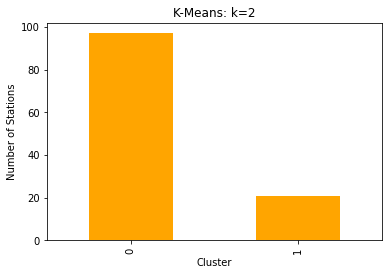

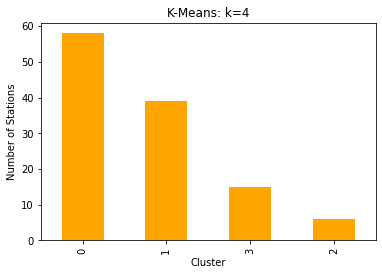

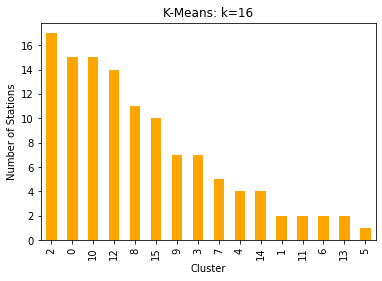

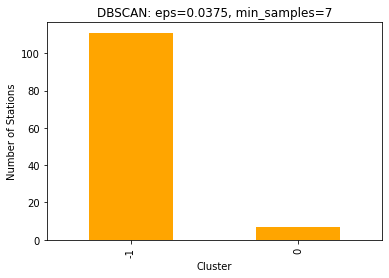

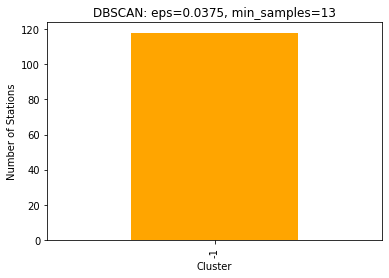

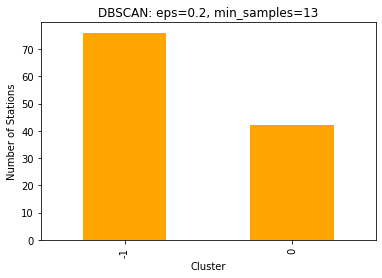

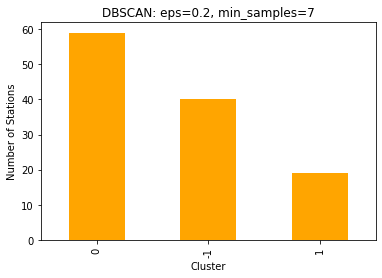

In [14]:
# K value of 2 graph
df_kmeans_2 = pd.DataFrame.from_dict(Counter(kmeans_2.labels_),orient='index',columns=['stations'])
df_kmeans_2['cluster'] = Counter(kmeans_2.labels_).keys()
df_kmeans_2 = df_kmeans_2.sort_values(['stations'], ascending=False)
k_means_2_graph = df_kmeans_2.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                       title='K-Means: k=2',legend=None)

# K value of 4 graph
df_kmeans_4 = pd.DataFrame.from_dict(Counter(kmeans_4.labels_),orient='index',columns=['stations'])
df_kmeans_4['cluster'] = Counter(kmeans_4.labels_).keys()
df_kmeans_4 = df_kmeans_4.sort_values(['stations'], ascending=False)
k_means_4_graph = df_kmeans_4.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                       title='K-Means: k=4',legend=None)

# K value of 16 graph
df_kmeans_16 = pd.DataFrame.from_dict(Counter(kmeans_16.labels_),orient='index',columns=['stations'])
df_kmeans_16['cluster'] = Counter(kmeans_16.labels_).keys()
df_kmeans_16 = df_kmeans_16.sort_values(['stations'], ascending=False)
k_means_16_graph = df_kmeans_16.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                         title='K-Means: k=16',legend=None)

# DBSCAN graph where eps is 0.0375 and min_samples is 7
df_db_1 = pd.DataFrame.from_dict(Counter(db_1.labels_),orient='index',columns=['stations'])
df_db_1['cluster'] = Counter(db_1.labels_).keys()
df_db_1 = df_db_1.sort_values(['stations'], ascending=False)
df_db_1_graph = df_db_1.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                 title='DBSCAN: eps=0.0375, min_samples=7',legend=None)

# DBSCAN graph where eps is 0.0375 and min_samples is 13
df_db_2 = pd.DataFrame.from_dict(Counter(db_2.labels_),orient='index',columns=['stations'])
df_db_2['cluster'] = Counter(db_2.labels_).keys()
df_db_2 = df_db_2.sort_values(['stations'], ascending=False)
df_db_2_graph = df_db_2.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                 title='DBSCAN: eps=0.0375, min_samples=13',legend=None)

# DBSCAN graph where eps is 0.2 and min_samples is 13
df_db_3 = pd.DataFrame.from_dict(Counter(db_3.labels_),orient='index',columns=['stations'])
df_db_3['cluster'] = Counter(db_3.labels_).keys()
df_db_3 = df_db_3.sort_values(['stations'], ascending=False)
df_db_3_graph = df_db_3.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                 title='DBSCAN: eps=0.2, min_samples=13',legend=None)

# DBSCAN graph where eps is 0.2 and min_samples is 7
df_db_4 = pd.DataFrame.from_dict(Counter(db_4.labels_),orient='index',columns=['stations'])
df_db_4['cluster'] = Counter(db_4.labels_).keys()
df_db_4 = df_db_4.sort_values(['stations'], ascending=False)
df_db_4_graph = df_db_4.plot.bar(x='cluster',y='stations',ylabel='Number of Stations',xlabel='Cluster',color='orange',
                                 title='DBSCAN: eps=0.2, min_samples=7',legend=None)

### Task 4.3

I selected the k values of 2,4,and 16 since these values cover a diverse set of potential combinations. Selecting the proper
k value is an important and often-convoluted task. Choosing a diverse set of potential k values is critical in order to
best expose trends. A k value that is too low leads to a high degree of variability, and a k value that is too high leads to a
low degree of variability. Because of this I chose a k value of 16 to be optimal. In this case, the best algorithm is K means clustering.
DBSCAN in all cases suffered from overfitting which led to a low degree of variability.